# BANK LOAN ANALYSIS PROJECT

### Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [8]:
df = pd.read_excel("C:/Users/HP/Downloads/financial_loan.xlsx")


In [9]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### metadata of data

In [5]:
print("No od rows:" , df.shape[0]) 

No od rows: 38576


In [7]:
print("No of columns:" , df.shape[1]) 

No of columns: 24


### data types

In [8]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat

df.describe()

### total loan applications

In [12]:
total_loan_applications = df['id'].count()
print("Total loan applications:" , total_loan_applications)

Total loan applications: 38576


###  MTD total loan applications

In [13]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD loan application (for {latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications }")



MTD loan application (for December 2021):4314


###   total funded amount

In [19]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print("Total funded amount: ${:.2f}M" . format(total_funded_amount_millions))

Total funded amount: $435.76M


###  MTD-total funded amount

In [26]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000
print("MTD total funded amount: ${:.2f}M" . format(mtd_total_funded_amount_millions))




MTD total funded amount: $53.98M


###  total amount received

In [30]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount / 1000000
print("Total amount received: ${:.2f}M" . format(total_amount_received_millions))

Total amount received: $435.76M


###  MTD total amount received

In [32]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print("MTD total amount received: ${:.2f}M" . format(mtd_total_amount_received_millions))


MTD total amount received: $58.07M


###  average interest rate 

In [37]:
average_interest_rate = df['int_rate'].mean()*100
print("Avg int rate:{:.2f}%" .format(average_interest_rate))

Avg int rate:12.05%


###  average debt to income ratio

In [38]:
average_dti = df['dti'].mean()*100
print("Avg DTI:{:.2f}%" .format(average_dti))

Avg DTI:13.33%


###  good loan metrics

In [42]:
good_loans = df[df['loan_status'].isin(["fully paid" , "current"])]   #good loans

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:,.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:,.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:,.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


###  bad loan metrics

In [46]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]  # Bad Loans

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))


Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


###  Monthly Trends by Issue Date for total funded amount

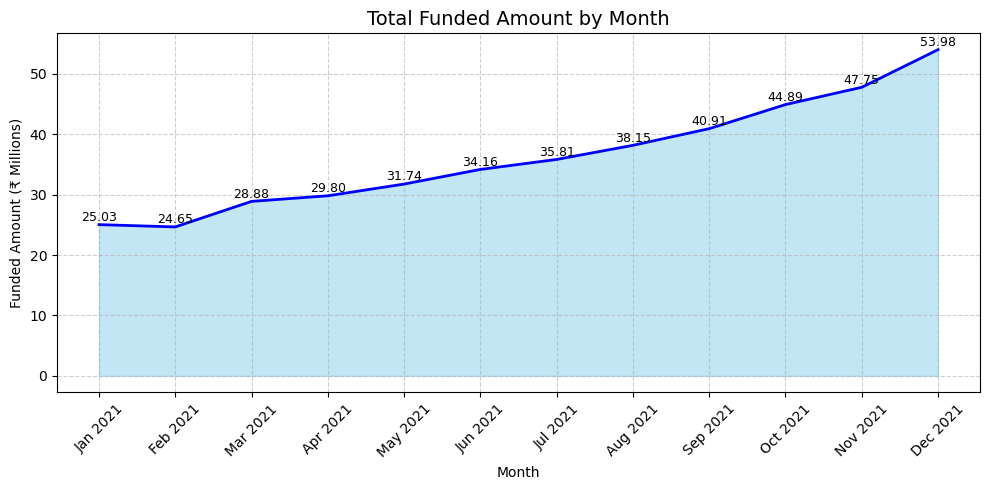

In [47]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  Monthly Trends by Issue Date for total loan applications 

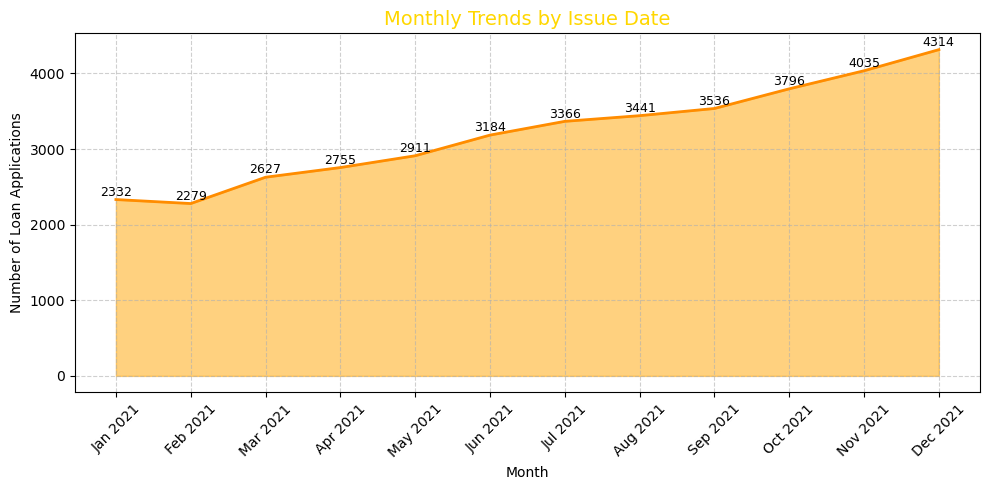

In [48]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)
      .size()   # count of applications
      .reset_index(name='application_count')
)

# Plot
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['application_count'], 
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['application_count'], 
         color='darkorange', linewidth=2)

# Annotate values
for i, row in monthly_applications.iterrows():
    plt.text(i, row['application_count'] + 10, f"{row['application_count']}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

# Title and labels
plt.title('Monthly Trends by Issue Date', fontsize=14, color='gold')
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###  Monthly Trends by Issue Date for total amount received

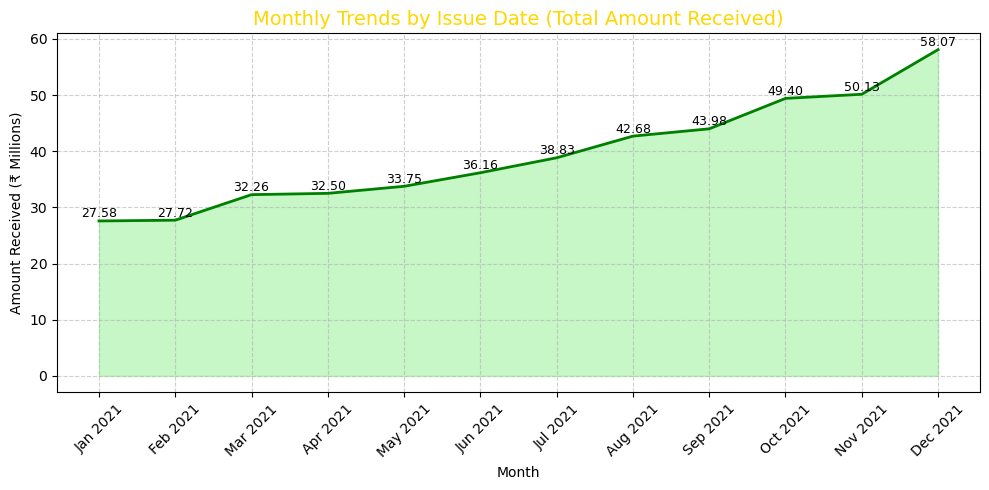

In [49]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']   # <-- replace with actual column name if different
      .sum()
      .div(1_000_000)  # Convert to Millions
      .reset_index(name='amount_received_millions')
)

# Plot
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['amount_received_millions'], 
                 color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['amount_received_millions'], 
         color='green', linewidth=2)

# Annotate values
for i, row in monthly_received.iterrows():
    plt.text(i, row['amount_received_millions'] + 0.1, f"{row['amount_received_millions']:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

# Title and labels
plt.title('Monthly Trends by Issue Date (Total Amount Received)', fontsize=14, color='gold')
plt.xlabel('Month')
plt.ylabel('Amount Received (₹ Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###  regional analysis by state for total funded amount 

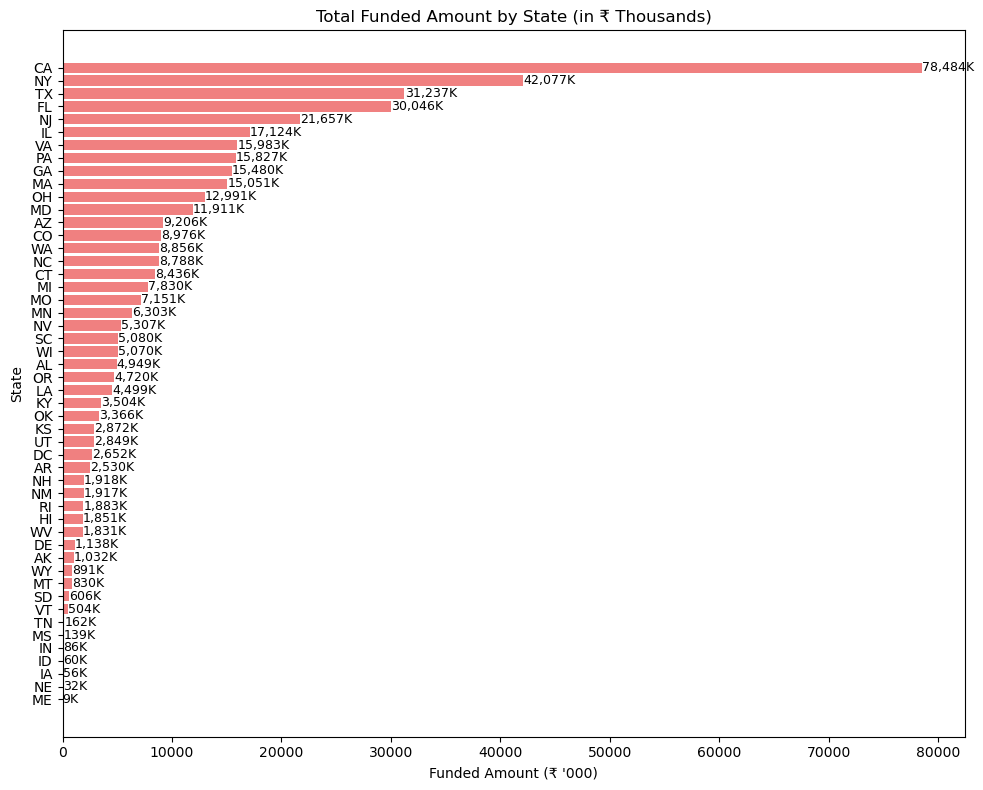

In [52]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


###  regional analysis by state for total loan applications

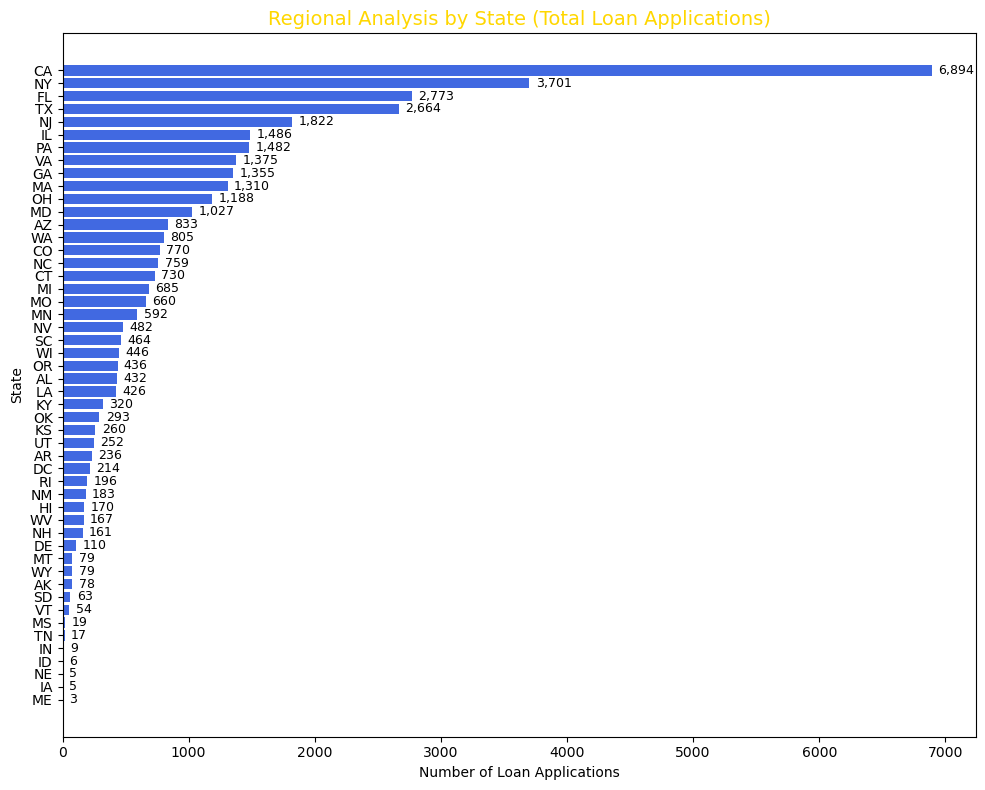

In [53]:

state_applications = df.groupby('address_state').size().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(state_applications.index, state_applications.values, color='royalblue')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height() / 2,
             f'{width:,}', va='center', fontsize=9)

# Title and labels
plt.title('Regional Analysis by State (Total Loan Applications)', fontsize=14, color='gold')
plt.xlabel('Number of Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()


###  regional analysis by state for total amount received

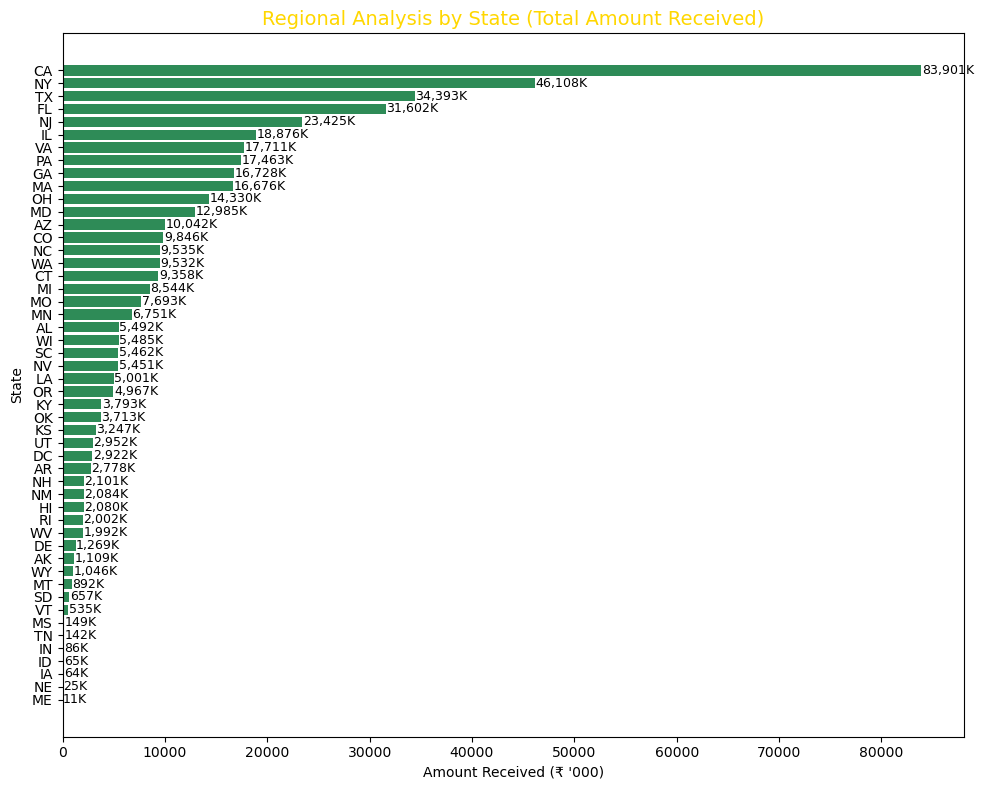

In [54]:

state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)  



state_received_thousands = state_received / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color='seagreen')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', va='center', fontsize=9)


plt.title('Regional Analysis by State (Total Amount Received)', fontsize=14, color='gold')
plt.xlabel('Amount Received (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


###  loan term analysis by total funded amount 

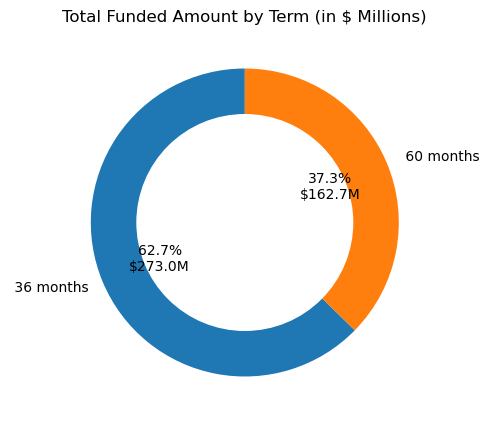

In [55]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()


###  loan term analysis by total loan applications

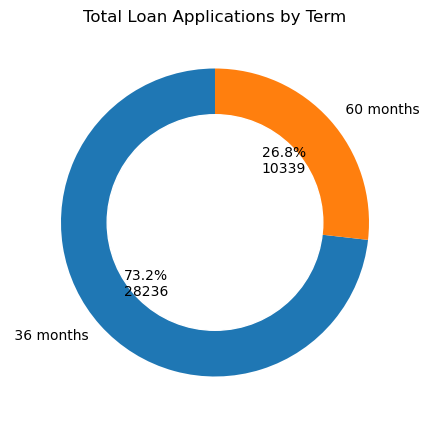

In [56]:

term_applications = df.groupby('term').size()

plt.figure(figsize=(5, 5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f'{p:.1f}%\n{int(p*sum(term_applications)/100)}',
    startangle=90,
    wedgeprops={'width': 0.4}
)


plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Loan Applications by Term")
plt.show()


###  loan term analysis by total amount received 

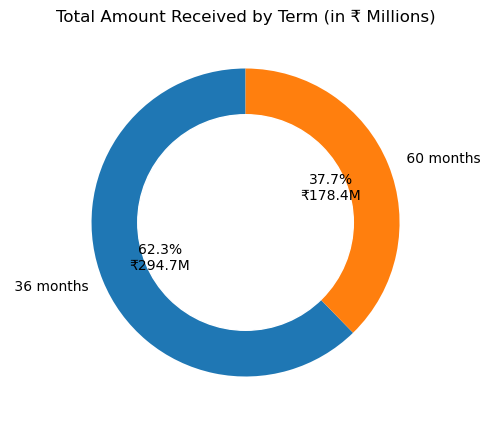

In [57]:

term_received_millions = df.groupby('term')['total_payment'].sum() / 1_000_000  


plt.figure(figsize=(5, 5))
plt.pie(
    term_received_millions,
    labels=term_received_millions.index,
    autopct=lambda p: f'{p:.1f}%\n₹{p*sum(term_received_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)


plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Amount Received by Term (in ₹ Millions)")
plt.show()


###  employee length analysis by total funded amount 

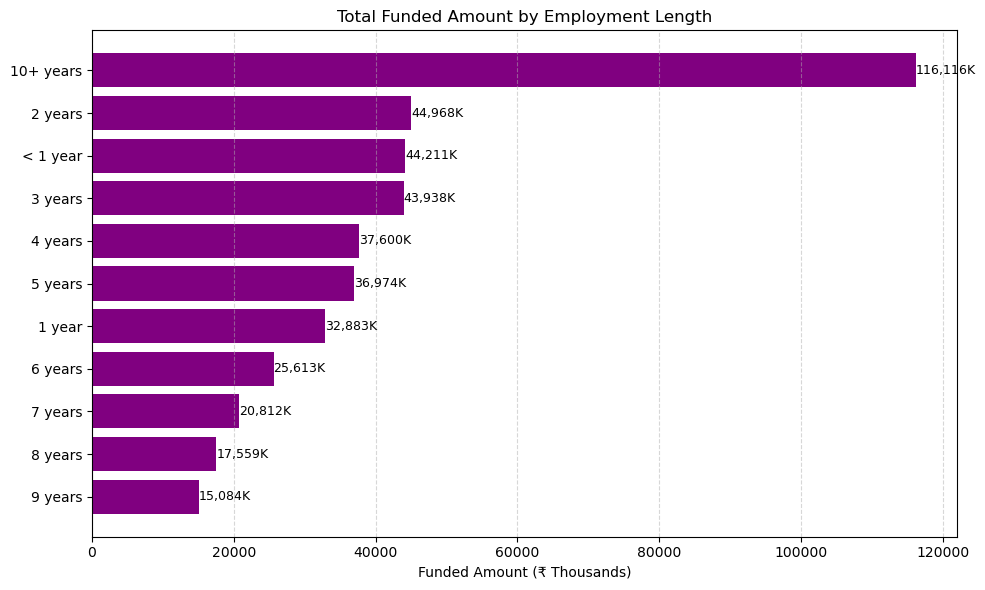

In [10]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  employee length analysis by total loan applications 

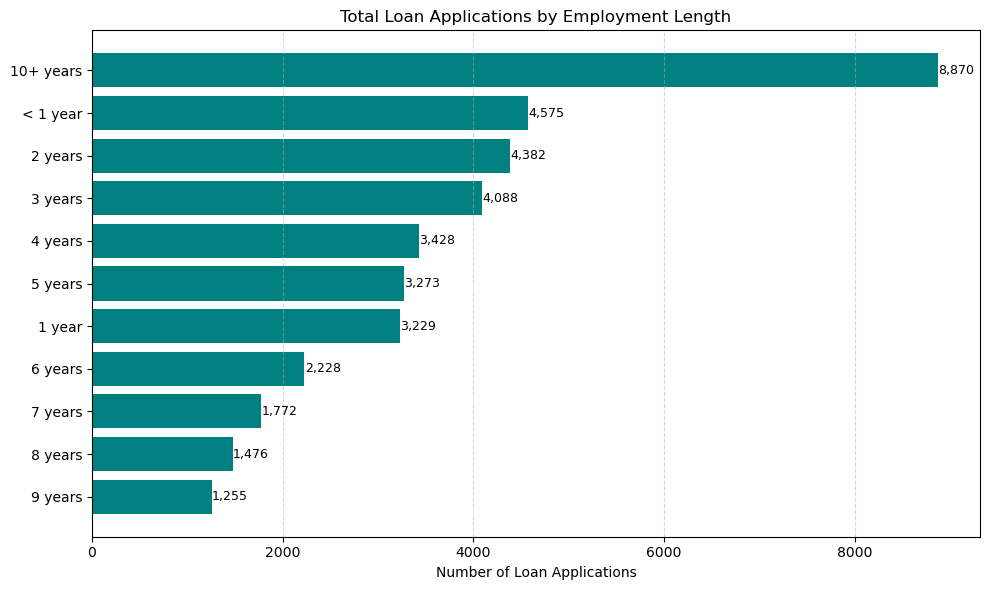

In [11]:
emp_applications = df['emp_length'].value_counts().sort_values()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(emp_applications.index, emp_applications.values, color='teal')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,}", va='center', fontsize=9)

# Labels and title
plt.xlabel("Number of Loan Applications")
plt.title("Total Loan Applications by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###  employee length analysis by total amount received 


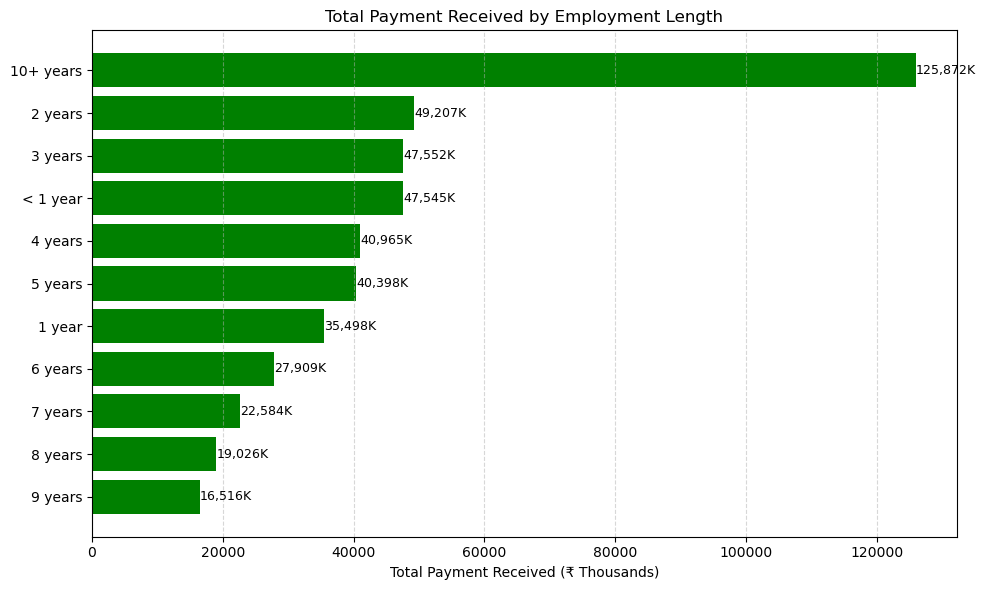

In [16]:

emp_payment = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000


plt.figure(figsize=(10, 6))
bars = plt.barh(emp_payment.index, emp_payment.values, color='green')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Total Payment Received (₹ Thousands)")
plt.title("Total Payment Received by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  loan purpose breakdown for total funded amount 


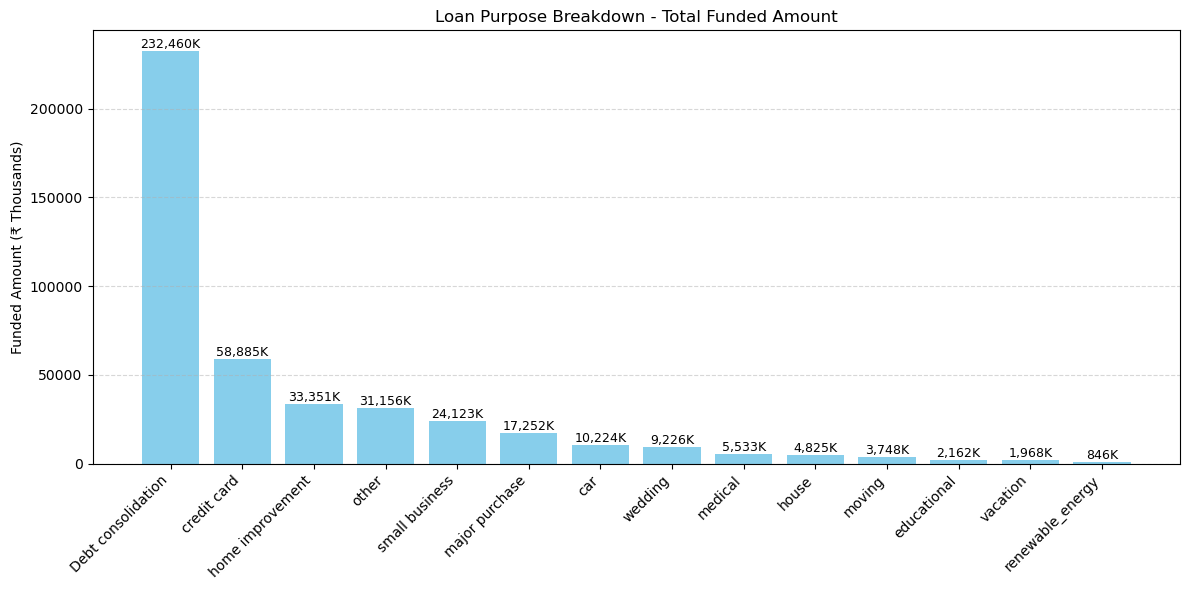

In [17]:

purpose_funding = df.groupby("purpose")["loan_amount"].sum().sort_values(ascending=False) / 1000


plt.figure(figsize=(12, 6))
bars = plt.bar(purpose_funding.index, purpose_funding.values, color="skyblue")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f"{height:,.0f}K", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Funded Amount (₹ Thousands)")
plt.title("Loan Purpose Breakdown - Total Funded Amount")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


###  loan purpose breakdown for total loan applications 


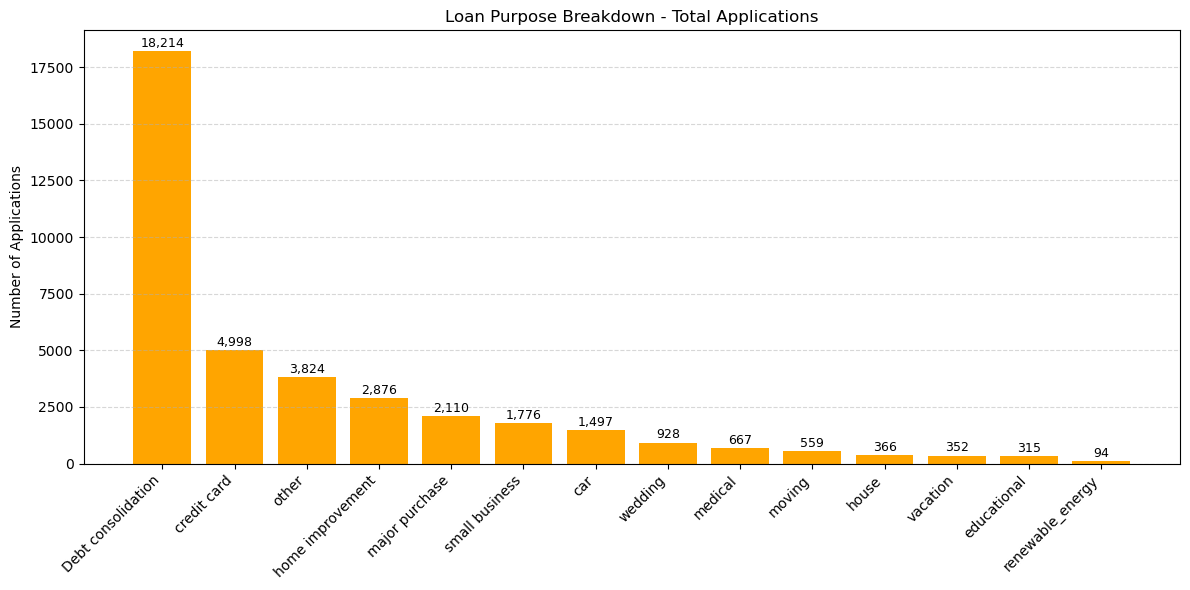

In [18]:

purpose_apps = df["purpose"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(purpose_apps.index, purpose_apps.values, color="orange")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,  # adjust offset
             f"{height:,}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Applications")
plt.title("Loan Purpose Breakdown - Total Applications")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


###  loan purpose breakdown for total amount received


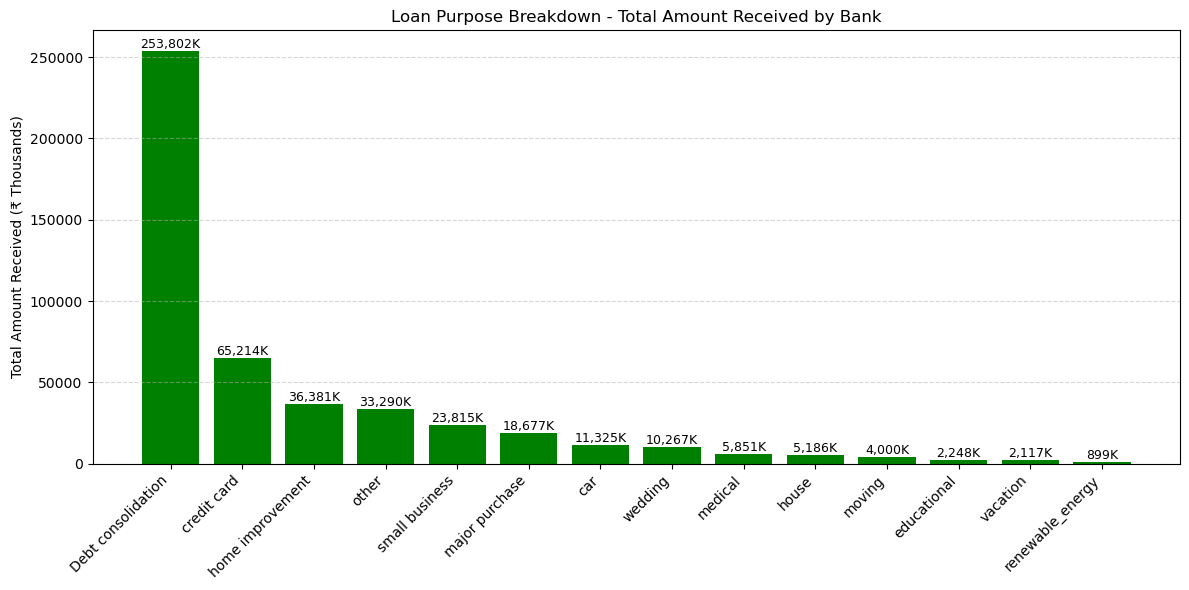

In [19]:

purpose_received = df.groupby("purpose")["total_payment"].sum().sort_values(ascending=False) / 1000


plt.figure(figsize=(12, 6))
bars = plt.bar(purpose_received.index, purpose_received.values, color="green")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f"{height:,.0f}K", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Amount Received (₹ Thousands)")
plt.title("Loan Purpose Breakdown - Total Amount Received by Bank")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


###  house ownership analysis for total funded amount 


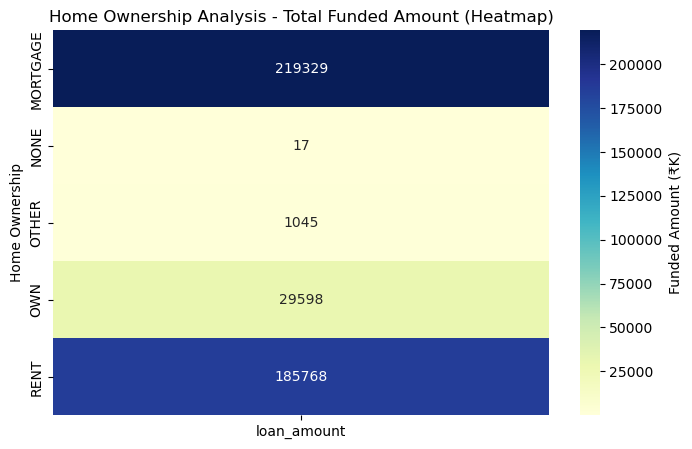

In [23]:

home_funding = df.groupby("home_ownership")["loan_amount"].sum().reset_index()

# Create pivot table (required for heatmap)
pivot_table = home_funding.pivot_table(values="loan_amount",
                                       index="home_ownership",
                                       aggfunc="sum") / 1000  # in thousands

# Plot Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table,
            annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Funded Amount (₹K)'})

plt.title("Home Ownership Analysis - Total Funded Amount (Heatmap)")
plt.ylabel("Home Ownership")
plt.xlabel("")
plt.show()
